# GSB 545: Advanced Machine Learning for Business Analytics

## Predicting Daily Bitcoin Stock

In this lab we'll be using a dataset from kaggle yet again...it's just so fun and rich! We're using data prepared using the Alpha Vantage API and posted on kaggle.

### DATASET:
- https://www.kaggle.com/datasets/ahmedadam415/digital-currency-time-series

### Primary Goals:

- Predict daily bitcoin stock

### Assignment Specs:

You need to explore multiple recurrent neural network models to solve this problem. 

The dataset includes multiple time series. You may choose which one you want to model.

Your submission should be built and written with non-experts as the target audience. All of your code should still be included, but do your best to narrate your work in accessible ways.

Again, submit an HTML, ipynb, or Colab link. Be sure to rerun your entire notebook fresh before submitting

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
from plotnine import ggplot, geom_point, geom_smooth, aes, stat_smooth, geom_line, xlim, ylim


## Loading the Data

In [2]:
def create_dataset_vars(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), :]
      dataX.append(a)
      dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [3]:
data = pd.read_csv('dc.csv')
data.head()

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [4]:
data2 = data[["volume"]].iloc[::-1]
data2.head()

,volume
999,33787
998,25533
997,25673
996,25055
995,48227


## Modeling

### Model 1: 80/20 Split and Look Back = 2, LSTM(4)

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data2 = scaler.fit_transform(data2)

train_size = int(len(data2) * 0.8)
test_size = len(data2) - train_size
train, test = data2[0:train_size], data2[train_size:len(data2)]
print(len(train), len(test))

800 200
800 200


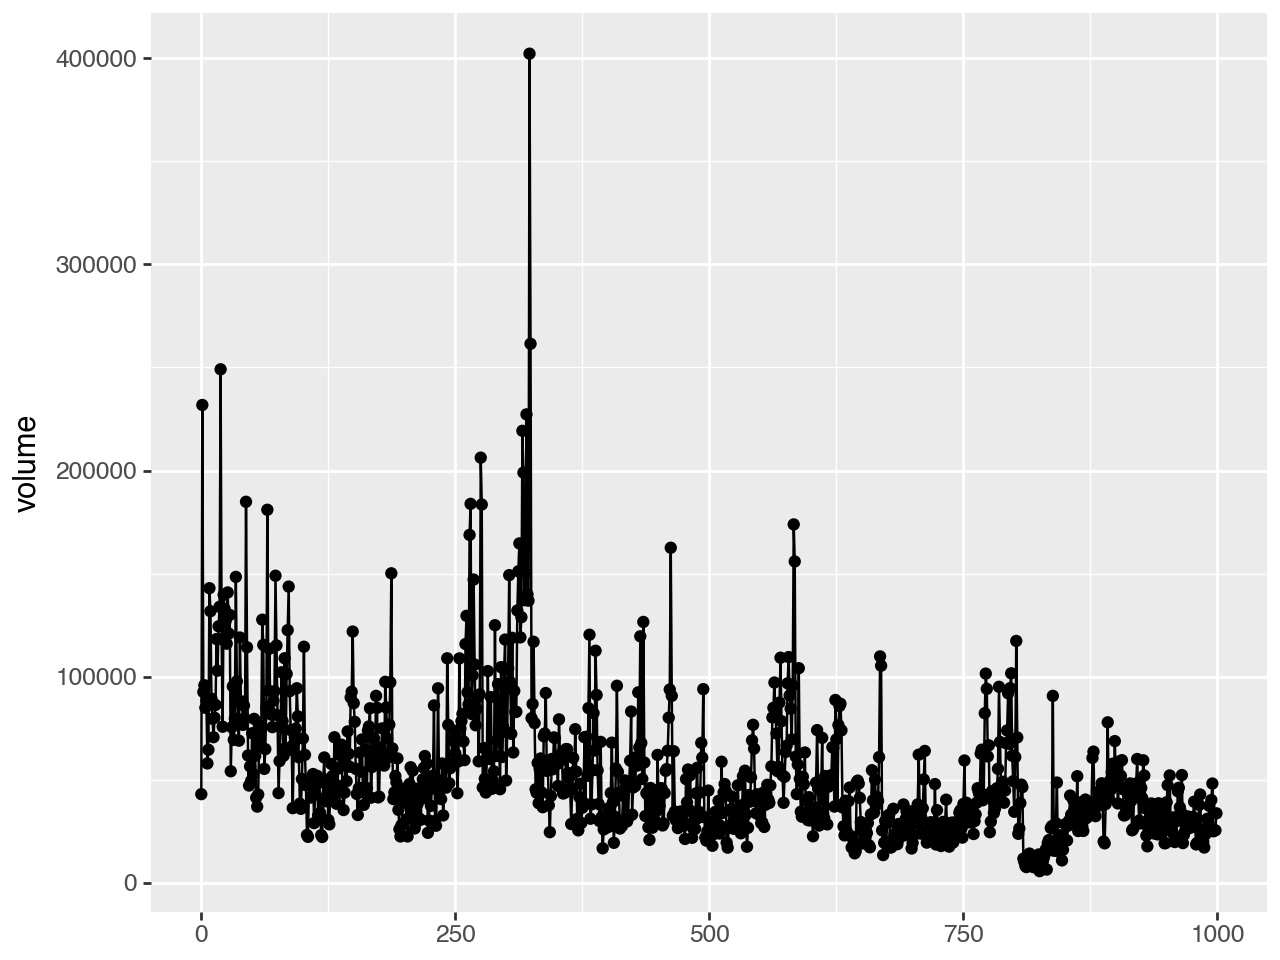

In [33]:
(ggplot(data, aes(range(len(data)), "volume"))
 + geom_point()
 + geom_line())

This plot displays the original volume values, which range widely and peak above 400,000. The large spikes dominate the chart, making it difficult to observe patterns in the lower-volume regions. But it seems that volume has gone down over time. 

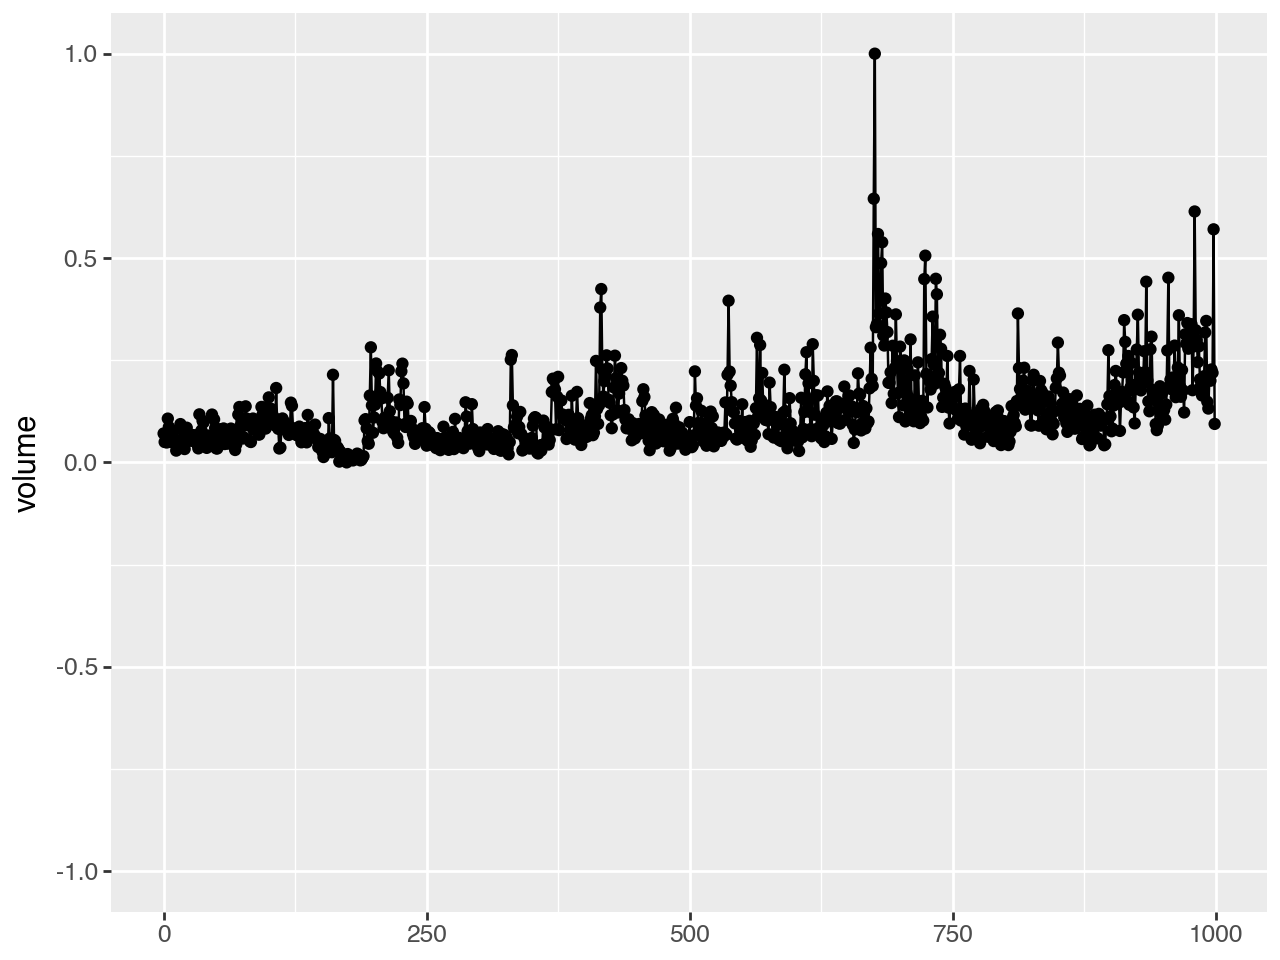

In [7]:
data3 = pd.DataFrame(data2)
data3.columns = ["volume"]
(ggplot(data3, aes(range(len(data3)), "volume"))
 + geom_point()
 + geom_line()
 + ylim(-1, 1))

This plot shows the volume data after scaling, compressing all values into a consistent range between -1 and 1. This allows for clearer visualization of smaller fluctuations and overall trends across the entire dataset.

In [10]:
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset_vars(train, look_back)
testX, testY = create_dataset_vars(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Epoch 1/10
Epoch 1/10


797/797 - 2s - 2ms/step - loss: 0.0058
797/797 - 2s - 2ms/step - loss: 0.0058


Epoch 2/10
Epoch 2/10


797/797 - 1s - 655us/step - loss: 0.0044
797/797 - 1s - 655us/step - loss: 0.0044


Epoch 3/10
Epoch 3/10


797/797 - 1s - 656us/step - loss: 0.0039
797/797 - 1s - 656us/step - loss: 0.0039


Epoch 4/10
Epoch 4/10


797/797 - 1s - 647us/step - loss: 0.0037
797/797 - 1s - 647us/step - loss: 0.0037


Epoch 5/10
Epoch 5/10


797/797 - 1s - 721us/step - loss: 0.0037
797/797 - 1s - 721us/step - loss: 0.0037


Epoch 6/10
Epoch 6/10


797/797 - 1s - 838us/step - loss: 0.0037
797/797 - 1s - 838us/step - loss: 0.0037


Epoch 7/10
Epoch 7/10


797/797 - 1s - 702us/step - loss: 0.0036
797/797 - 1s - 702us/step - loss: 0.0036


Epoch 8/10
Epoch 8/10


797/797 - 1s - 702us/step - loss: 0.0036
797/797 - 1s - 702us/step - loss: 0.0036


Epoch 9/10
Epoch 9/10


797/797 - 1s - 694us/step - loss: 0.0036
797/797 - 1s - 694us/step - loss: 0.0036


Epoch 10/10
Epoch 10/10


797/797 - 1s - 672us/step - loss: 0.0036
797/797 - 1s - 672us/step - loss: 0.0036


In [12]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

 1/25 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Train Score: 23709.14 RMSE
Test Score: 29375.80 RMSE
Train Score: 23709.14 RMSE
Test Score: 29375.80 RMSE


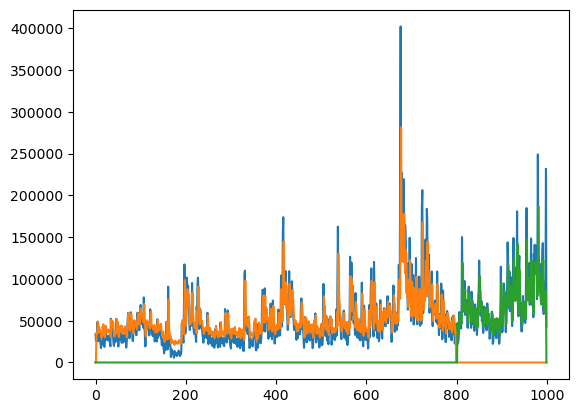

In [13]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data2)
#trainPredictPlot[:, :] = np.nan
trainPredictPlot[:, :] = 0
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data2)
#testPredictPlot[:, :] = np.nan
testPredictPlot[:, :] = 0
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data2)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

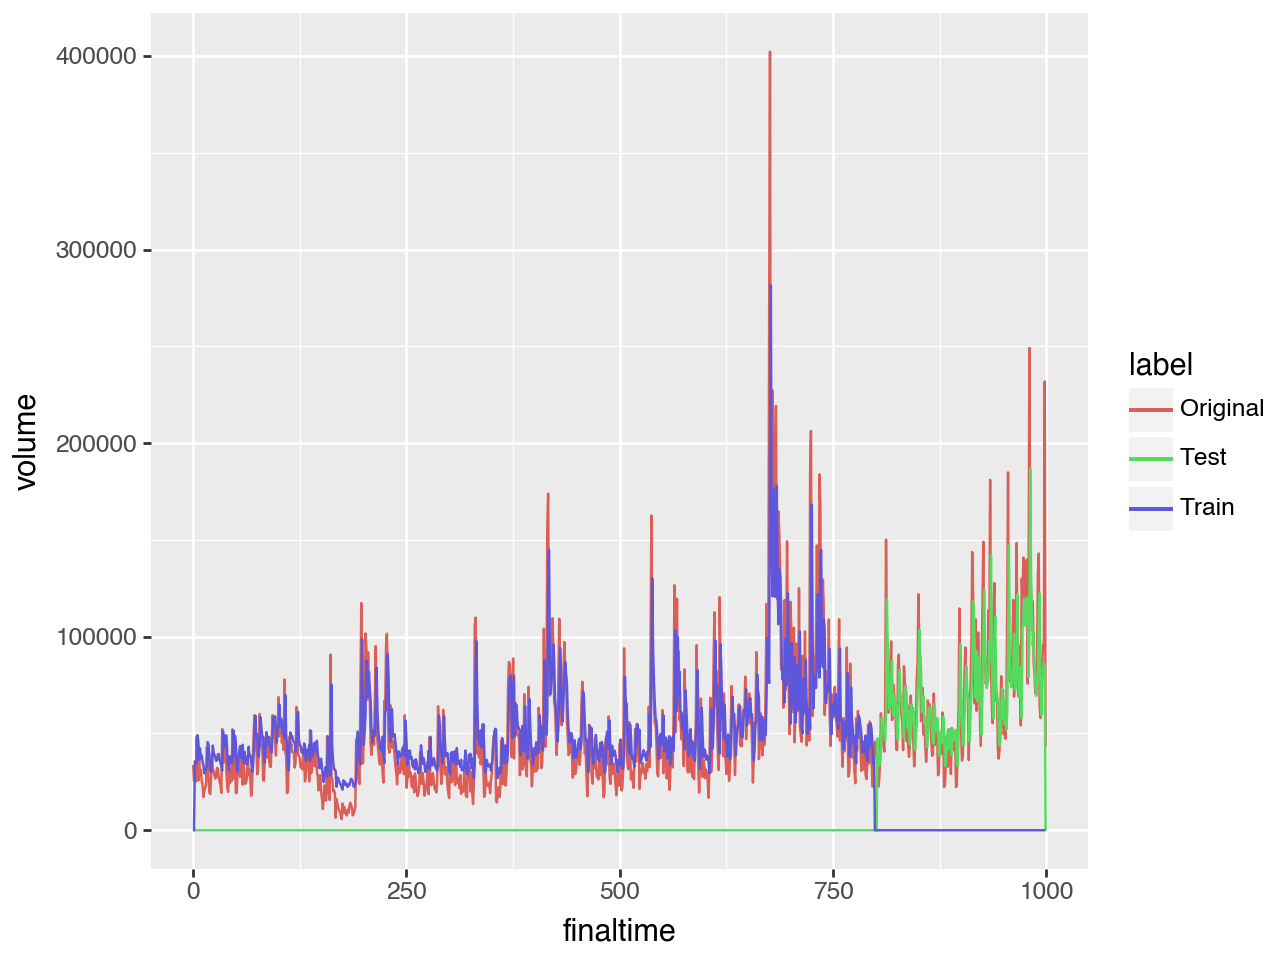

In [15]:
finalma = np.append(scaler.inverse_transform(data2).flatten(), trainPredictPlot.flatten())
finalma = np.append(finalma, testPredictPlot.flatten())

finallabels = np.append(["Original"]*len(trainPredictPlot), ["Train"]*len(trainPredictPlot))
finallabels = np.append(finallabels, ["Test"]*len(trainPredictPlot))

finaltime = np.append(range(len(trainPredictPlot)), range(len(trainPredictPlot)))
finaltime = np.append(finaltime, range(len(trainPredictPlot)))

results = pd.DataFrame(data = 
    {'timeindex': finaltime,
    'volume': finalma,
    'label': finallabels}
)

(ggplot(results, aes("finaltime", "volume", color = "label"))
 + geom_line())

### Model 2: 80/20 Split and Look Back = 3, LSTM(6)

In [17]:
# change our look back from 2 to 3
look_back = 3
trainX, trainY = create_dataset_vars(train, look_back)
testX, testY = create_dataset_vars(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], look_back, 1))
testX = np.reshape(testX, (testX.shape[0], look_back, 1))

In [18]:
# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(6, input_shape=(look_back, 1)))  # Update the input_shape
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


796/796 - 2s - 2ms/step - loss: 0.0044
796/796 - 2s - 2ms/step - loss: 0.0044


Epoch 2/10
Epoch 2/10


796/796 - 1s - 795us/step - loss: 0.0039
796/796 - 1s - 795us/step - loss: 0.0039


Epoch 3/10
Epoch 3/10


796/796 - 1s - 826us/step - loss: 0.0038
796/796 - 1s - 826us/step - loss: 0.0038


Epoch 4/10
Epoch 4/10


796/796 - 1s - 815us/step - loss: 0.0038
796/796 - 1s - 815us/step - loss: 0.0038


Epoch 5/10
Epoch 5/10


796/796 - 1s - 889us/step - loss: 0.0038
796/796 - 1s - 889us/step - loss: 0.0038


Epoch 6/10
Epoch 6/10


796/796 - 1s - 1ms/step - loss: 0.0038
796/796 - 1s - 1ms/step - loss: 0.0038


Epoch 7/10
Epoch 7/10


796/796 - 1s - 855us/step - loss: 0.0037
796/796 - 1s - 855us/step - loss: 0.0037


Epoch 8/10
Epoch 8/10


796/796 - 1s - 857us/step - loss: 0.0037
796/796 - 1s - 857us/step - loss: 0.0037


Epoch 9/10
Epoch 9/10


796/796 - 1s - 870us/step - loss: 0.0037
796/796 - 1s - 870us/step - loss: 0.0037


Epoch 10/10
Epoch 10/10


796/796 - 1s - 994us/step - loss: 0.0036
796/796 - 1s - 994us/step - loss: 0.0036


In [19]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

 1/25 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Train Score: 23186.81 RMSE
Test Score: 30441.44 RMSE
Train Score: 23186.81 RMSE
Test Score: 30441.44 RMSE


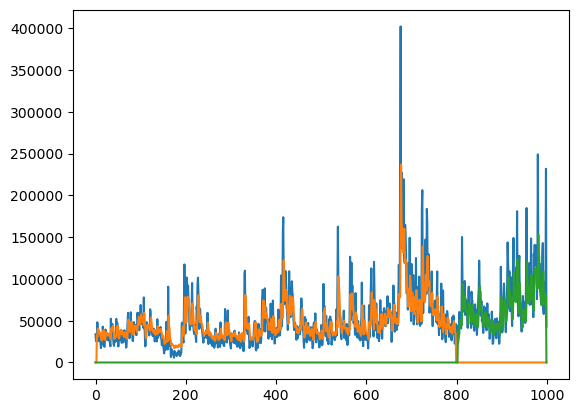

In [20]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data2)
#trainPredictPlot[:, :] = np.nan
trainPredictPlot[:, :] = 0
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data2)
#testPredictPlot[:, :] = np.nan
testPredictPlot[:, :] = 0
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data2)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

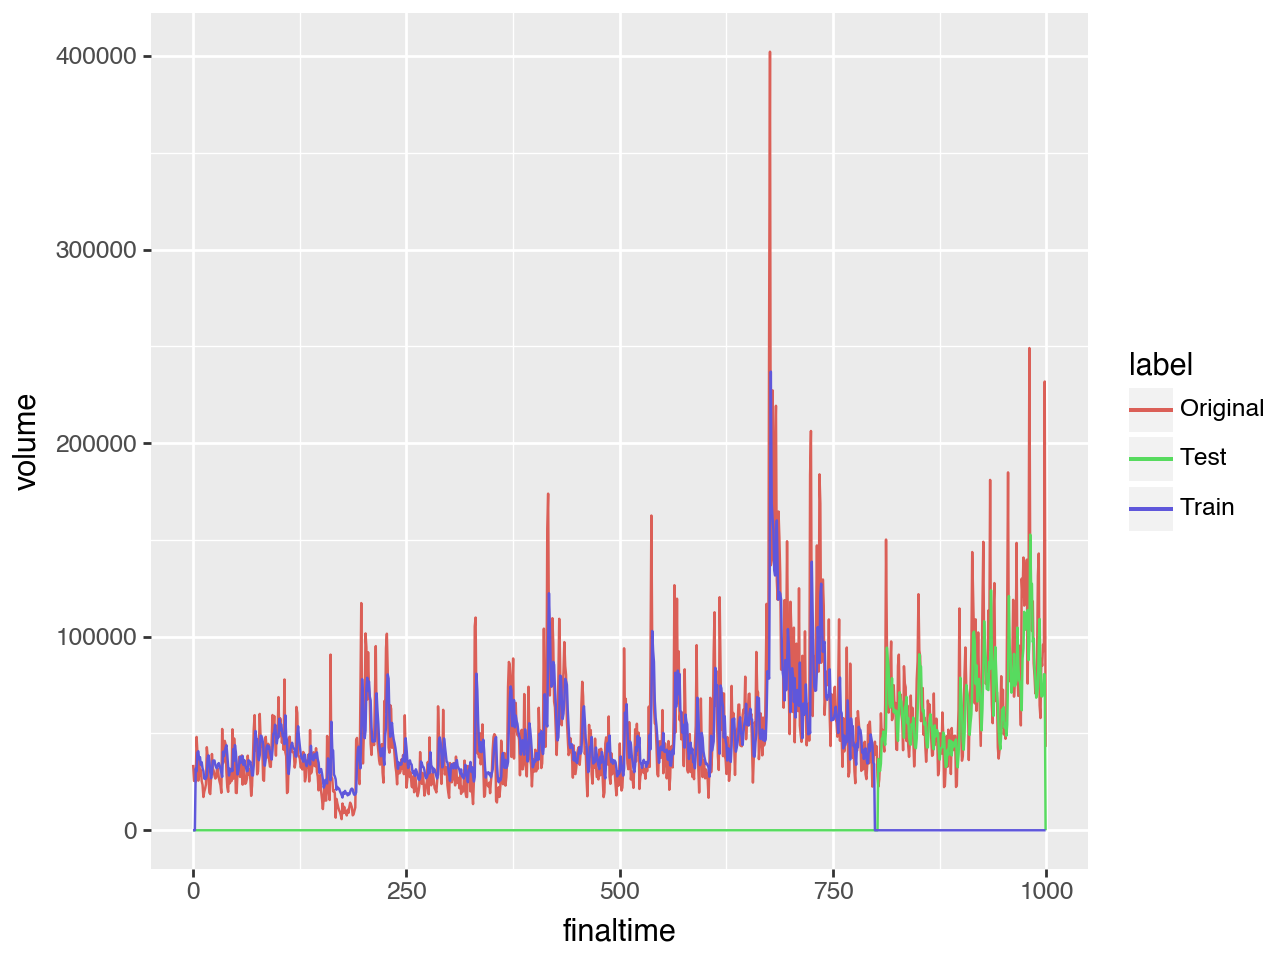

In [21]:
finalma = np.append(scaler.inverse_transform(data2).flatten(), trainPredictPlot.flatten())
finalma = np.append(finalma, testPredictPlot.flatten())

finallabels = np.append(["Original"]*len(trainPredictPlot), ["Train"]*len(trainPredictPlot))
finallabels = np.append(finallabels, ["Test"]*len(trainPredictPlot))

finaltime = np.append(range(len(trainPredictPlot)), range(len(trainPredictPlot)))
finaltime = np.append(finaltime, range(len(trainPredictPlot)))

results = pd.DataFrame(data = 
    {'timeindex': finaltime,
    'volume': finalma,
    'label': finallabels}
)

(ggplot(results, aes("finaltime", "volume", color = "label"))
 + geom_line())

### Model 3: 80/20 Split and Look Back = 4, LSTM(10)

In [23]:
# change our look back from 3 to 4
look_back = 4
trainX, trainY = create_dataset_vars(train, look_back)
testX, testY = create_dataset_vars(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], look_back, 1))
testX = np.reshape(testX, (testX.shape[0], look_back, 1))

In [24]:
# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(10, input_shape=(look_back, 1)))  # Update the input_shape
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


795/795 - 2s - 2ms/step - loss: 0.0090
795/795 - 2s - 2ms/step - loss: 0.0090


Epoch 2/10
Epoch 2/10


795/795 - 1s - 939us/step - loss: 0.0043
795/795 - 1s - 939us/step - loss: 0.0043


Epoch 3/10
Epoch 3/10


795/795 - 1s - 975us/step - loss: 0.0041
795/795 - 1s - 975us/step - loss: 0.0041


Epoch 4/10
Epoch 4/10


795/795 - 1s - 1ms/step - loss: 0.0039
795/795 - 1s - 1ms/step - loss: 0.0039


Epoch 5/10
Epoch 5/10


795/795 - 1s - 941us/step - loss: 0.0039
795/795 - 1s - 941us/step - loss: 0.0039


Epoch 6/10
Epoch 6/10


795/795 - 1s - 952us/step - loss: 0.0039
795/795 - 1s - 952us/step - loss: 0.0039


Epoch 7/10
Epoch 7/10


795/795 - 1s - 939us/step - loss: 0.0038
795/795 - 1s - 939us/step - loss: 0.0038


Epoch 8/10
Epoch 8/10


795/795 - 1s - 926us/step - loss: 0.0038
795/795 - 1s - 926us/step - loss: 0.0038


Epoch 9/10
Epoch 9/10


795/795 - 1s - 933us/step - loss: 0.0038
795/795 - 1s - 933us/step - loss: 0.0038


Epoch 10/10
Epoch 10/10


795/795 - 1s - 1ms/step - loss: 0.0037
795/795 - 1s - 1ms/step - loss: 0.0037


In [25]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

 1/25 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Train Score: 23564.04 RMSE
Test Score: 30724.54 RMSE
Train Score: 23564.04 RMSE
Test Score: 30724.54 RMSE


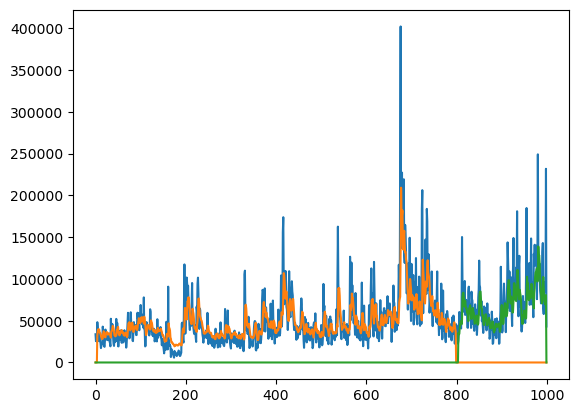

In [26]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data2)
#trainPredictPlot[:, :] = np.nan
trainPredictPlot[:, :] = 0
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data2)
#testPredictPlot[:, :] = np.nan
testPredictPlot[:, :] = 0
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data2)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

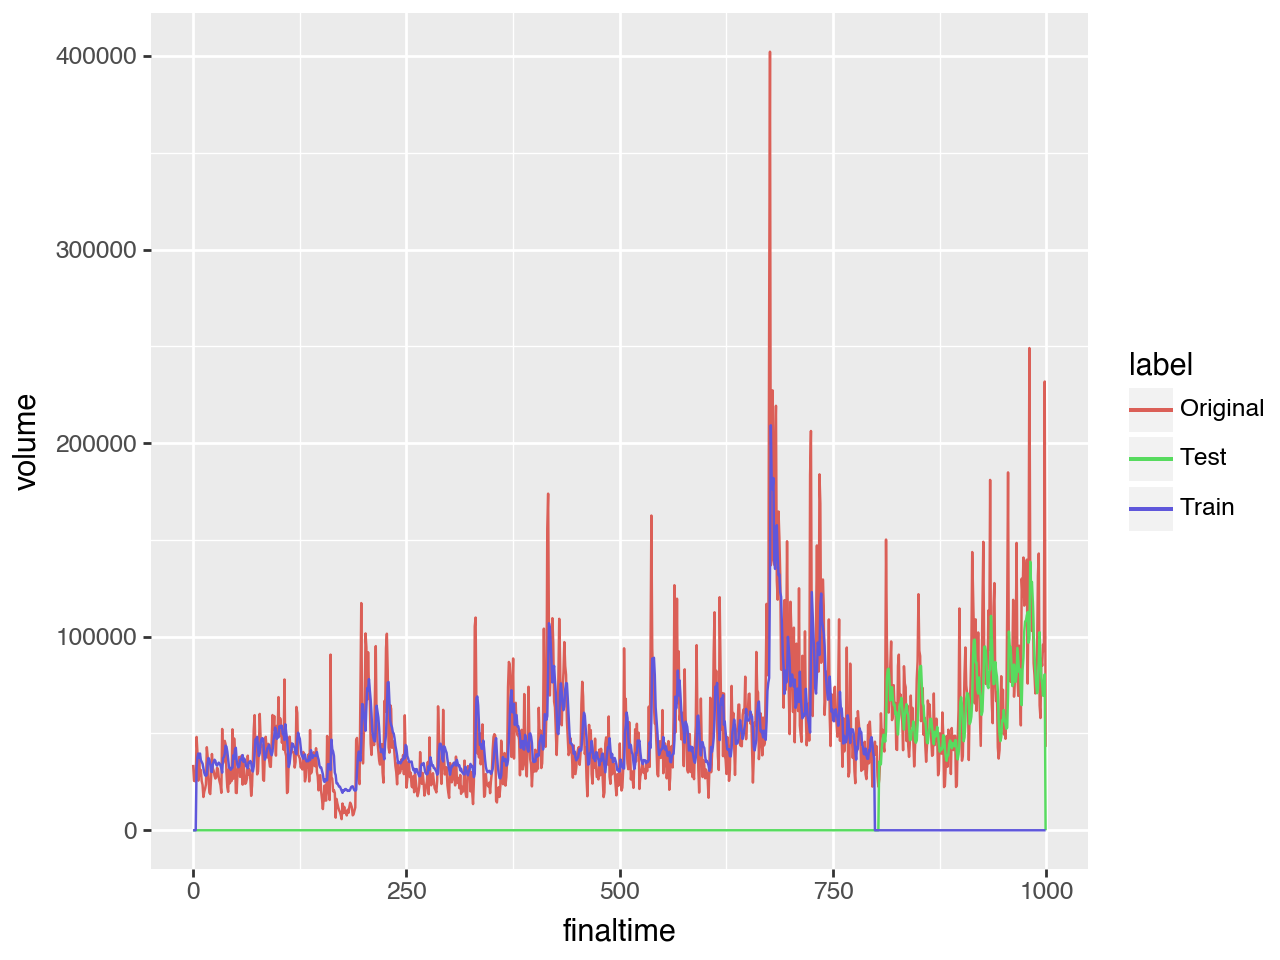

In [27]:
finalma = np.append(scaler.inverse_transform(data2).flatten(), trainPredictPlot.flatten())
finalma = np.append(finalma, testPredictPlot.flatten())

finallabels = np.append(["Original"]*len(trainPredictPlot), ["Train"]*len(trainPredictPlot))
finallabels = np.append(finallabels, ["Test"]*len(trainPredictPlot))

finaltime = np.append(range(len(trainPredictPlot)), range(len(trainPredictPlot)))
finaltime = np.append(finaltime, range(len(trainPredictPlot)))

results = pd.DataFrame(data = 
    {'timeindex': finaltime,
    'volume': finalma,
    'label': finallabels}
)

(ggplot(results, aes("finaltime", "volume", color = "label"))
 + geom_line())

### Model 4: 75/25 Split and Look Back = 2, LSTM(4)

In [56]:
train_size = int(len(data2) * 0.75)
test_size = len(data2) - train_size
train, test = data2[0:train_size], data2[train_size:len(data2)]
print(len(train), len(test))

750 250
750 250


In [57]:
look_back = 2
trainX, trainY = create_dataset_vars(train, look_back)
testX, testY = create_dataset_vars(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], look_back, 1))
testX = np.reshape(testX, (testX.shape[0], look_back, 1))

In [58]:
# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1))) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


747/747 - 1s - 2ms/step - loss: 0.0083
747/747 - 1s - 2ms/step - loss: 0.0083


Epoch 2/10
Epoch 2/10


747/747 - 1s - 839us/step - loss: 0.0059
747/747 - 1s - 839us/step - loss: 0.0059


Epoch 3/10
Epoch 3/10


747/747 - 1s - 752us/step - loss: 0.0049
747/747 - 1s - 752us/step - loss: 0.0049


Epoch 4/10
Epoch 4/10


747/747 - 1s - 784us/step - loss: 0.0044
747/747 - 1s - 784us/step - loss: 0.0044


Epoch 5/10
Epoch 5/10


747/747 - 1s - 1ms/step - loss: 0.0042
747/747 - 1s - 1ms/step - loss: 0.0042


Epoch 6/10
Epoch 6/10


747/747 - 1s - 856us/step - loss: 0.0041
747/747 - 1s - 856us/step - loss: 0.0041


Epoch 7/10
Epoch 7/10


747/747 - 1s - 756us/step - loss: 0.0040
747/747 - 1s - 756us/step - loss: 0.0040


Epoch 8/10
Epoch 8/10


747/747 - 1s - 782us/step - loss: 0.0041
747/747 - 1s - 782us/step - loss: 0.0041


Epoch 9/10
Epoch 9/10


747/747 - 1s - 781us/step - loss: 0.0040
747/747 - 1s - 781us/step - loss: 0.0040


Epoch 10/10
Epoch 10/10


747/747 - 1s - 758us/step - loss: 0.0040
747/747 - 1s - 758us/step - loss: 0.0040


In [59]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

 1/24 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Train Score: 24594.11 RMSE
Test Score: 28229.71 RMSE
Train Score: 24594.11 RMSE
Test Score: 28229.71 RMSE


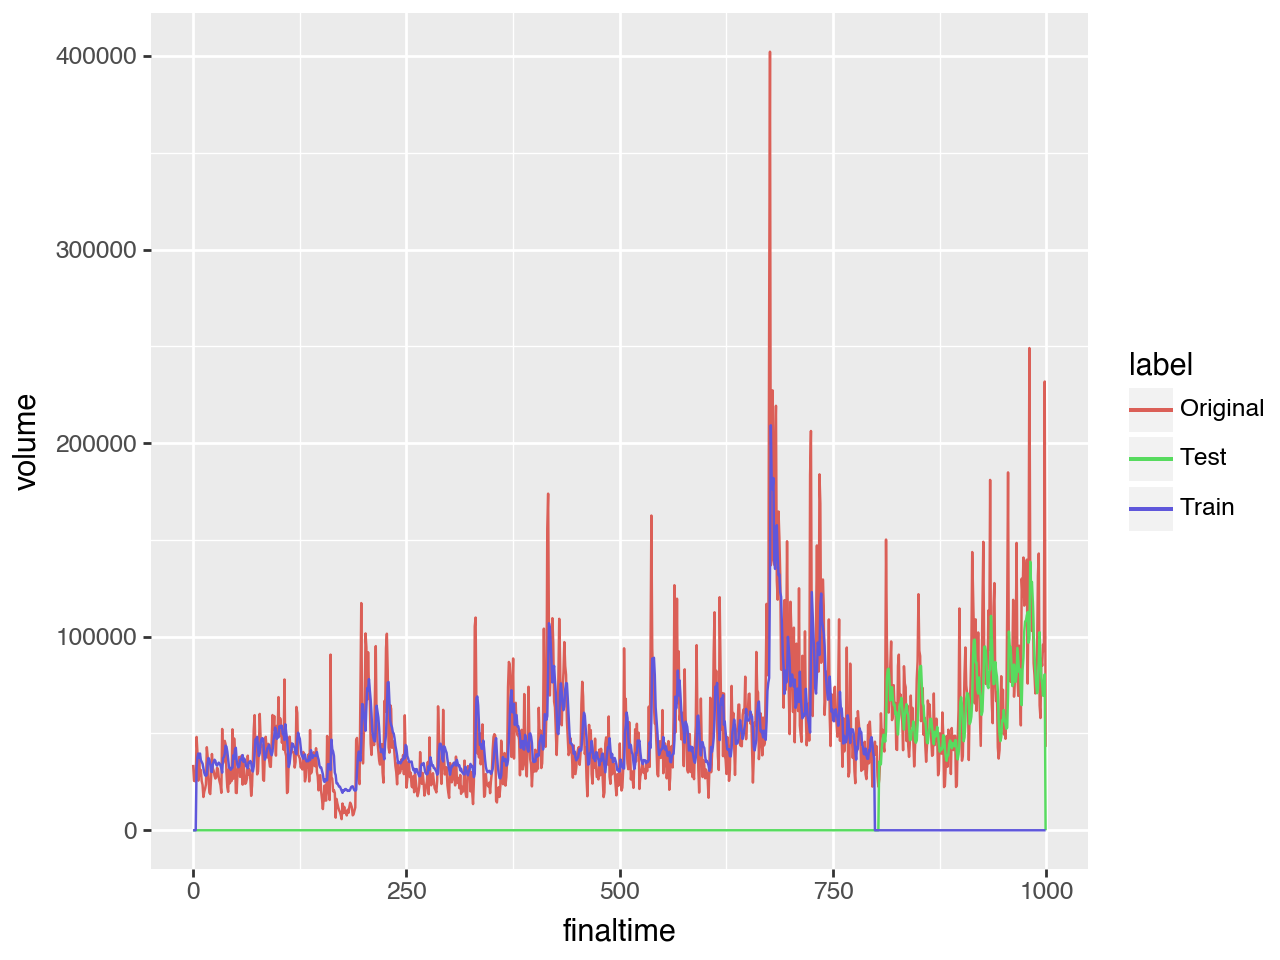

In [60]:
finalma = np.append(scaler.inverse_transform(data2).flatten(), trainPredictPlot.flatten())
finalma = np.append(finalma, testPredictPlot.flatten())

finallabels = np.append(["Original"]*len(trainPredictPlot), ["Train"]*len(trainPredictPlot))
finallabels = np.append(finallabels, ["Test"]*len(trainPredictPlot))

finaltime = np.append(range(len(trainPredictPlot)), range(len(trainPredictPlot)))
finaltime = np.append(finaltime, range(len(trainPredictPlot)))

results = pd.DataFrame(data = 
    {'timeindex': finaltime,
    'volume': finalma,
    'label': finallabels}
)

(ggplot(results, aes("finaltime", "volume", color = "label"))
 + geom_line())

## Conclusion
Out of the 3 models with an 80/20 split, model 1 performed the best which has the lowest RMSE of 29375.80. This can be seen in the graphs because model 1's predictions are closest to the actual values. Then I increases the test training split to 75/25 and got the lowest RMSE of 28229.71.